# Single Orbital 

In [ ]:
from hubbard.data import block_to_feature
from ase.io import read
from hubbard.data import AtomicData
from hubbard.utils.make_kpoints import kmesh_sampling
from hubbard.gutz import GhostGutzwiller
import numpy as np

# setup_seed(1234)

U = 5.5
J = 0. # 0.25 * U
Up = U - 2*J
Jp = J

gga = GhostGutzwiller(
    atomic_number=np.array([6, 14]),
    nocc=2,
    basis={"C":[1], "Si":[1]},
    idx_intorb={"C":[0], "Si":[0]},
    naux=3,
    intparams={"C":[{"U":U,"Up":Up,"J":J, "Jp":Jp}], "Si":[{"U":U,"Up":Up,"J":J, "Jp":Jp}]},
    nspin=2,
    kBT=0.0002,
    mutol=1e-7,
    solver="ED",
    mixer_options={"method": "Linear", "a": 0.3},
    iscomplex=True,
    solver_options={}# {"mfepmin":500, "channels": 10},
)

t = -1.
t_ = 0.3
delta = 0.9
tp = - t_ * (1+delta)
tm = - t_ * (1-delta)

block = {
    "0_0_0_0_0": np.zeros((1,1)),
    "1_1_0_0_0": np.zeros((1,1)),
    
    # 1nn for 0
    "0_1_0_0_0": np.array([[t]]),
    "0_1_-1_0_0": np.array([[t]]),
    "0_1_0_-1_0": np.array([[t]]),
    "0_1_-1_-1_0": np.array([[t]]),
    
    # 1nn for 1
    "1_0_0_0_0": np.array([[t]]),
    "1_0_0_1_0": np.array([[t]]),
    "1_0_1_1_0": np.array([[t]]),
    "1_0_1_0_0": np.array([[t]]),

    # 2nn for 0
    "0_0_-1_0_0": np.array([[tp]]),
    "0_0_1_0_0": np.array([[tp]]),
    "0_0_0_1_0": np.array([[tm]]),
    "0_0_0_-1_0": np.array([[tm]]),

    # 2nn for 1
    "1_1_-1_0_0": np.array([[tm]]),
    "1_1_1_0_0": np.array([[tm]]),
    "1_1_0_1_0": np.array([[tp]]),
    "1_1_0_-1_0": np.array([[tp]]),
}

for k in block:
    block[k] = np.kron(block[k], np.eye(2))

atomicdata = AtomicData.from_ase(
    read("../../hubbard/test/am.vasp"),
    r_max=2.7
    )

atoms = atomicdata.to_ase()

atomicdata["kpoint"] = kmesh_sampling([20,20,1], True)
block_to_feature(atomicdata, gga.kinetic.idp_phy, block)
atomicdata = AtomicData.to_AtomicDataDict(atomicdata)
atomicdata = gga.kinetic.idp_phy(atomicdata)

In [2]:
gga.run(atomicdata, 1000, 1e-3)

DM_kin:  [0.01979887 0.01979887 0.09674603 0.09674603 0.26095942 0.26095942
 0.62301814 0.62301814 0.99947877 0.99947877 0.99999875 0.99999875]
 -- Current error: 49.89277
DM_kin:  [0.00533404 0.00533404 0.00932874 0.00932874 0.30273843 0.30273843
 0.68274162 0.68274162 0.99989372 0.99989372 0.99996345 0.99996345]
 -- Current error: 32.72831
DM_kin:  [0.00174809 0.00174809 0.00379638 0.00379638 0.30627958 0.30627958
 0.68834916 0.68834916 0.99987627 0.99987627 0.99995053 0.99995053]
 -- Current error: 27.81476
DM_kin:  [0.00125793 0.00125793 0.00293786 0.00293786 0.30675716 0.30675716
 0.68927391 0.68927391 0.99984292 0.99984292 0.99993022 0.99993022]
 -- Current error: 21.85123
DM_kin:  [0.00114135 0.00114135 0.00282513 0.00282513 0.30679664 0.30679664
 0.68953416 0.68953416 0.99979775 0.99979775 0.99990498 0.99990498]
 -- Current error: 16.58130
DM_kin:  [0.00113148 0.00113148 0.00282791 0.00282791 0.3067524  0.3067524
 0.68966925 0.68966925 0.99974709 0.99974709 0.99987187 0.9998718

{'C': array([[[ 0.92818356+0.j        ,  0.        +0.j        ,
          -0.00973856-0.03331401j,  0.        +0.j        ,
          -0.22160758+0.04475623j,  0.        +0.j        ],
         [ 0.        +0.j        ,  0.92961187+0.j        ,
           0.        +0.j        ,  0.00383309+0.01311237j,
           0.        +0.j        , -0.19774985+0.03993789j],
         [-0.00973856+0.03331401j,  0.        +0.j        ,
           0.28643377+0.j        ,  0.        +0.j        ,
           0.01511393-0.17712946j,  0.        +0.j        ],
         [ 0.        +0.j        ,  0.00383309-0.01311237j,
           0.        +0.j        ,  0.41151608+0.j        ,
           0.        +0.j        ,  0.0261243 -0.30616672j],
         [-0.22160758-0.04475623j,  0.        +0.j        ,
           0.01511393+0.17712946j,  0.        +0.j        ,
           0.16149685+0.j        ,  0.        +0.j        ],
         [ 0.        +0.j        , -0.19774985-0.03993789j,
           0.        +0.j     

# Double Orbital 

In [ ]:
from hubbard.data import block_to_feature
from ase.io import read
from hubbard.data import AtomicData
from hubbard.utils.make_kpoints import kmesh_sampling
from hubbard.gutz import GhostGutzwiller
from hubbard.utils.tools import setup_seed
import numpy as np

# setup_seed(1234)
U = 3.5
J = 0.5 * U # 0.25 * U
Up = 0. #U - 2*J
Jp = J

gga = GhostGutzwiller(
    atomic_number=np.array([6]),
    nocc=2,
    basis={"C":[2]},
    idx_intorb={"C":[0]},
    naux=3,
    intparams={"C":[{"U":U,"Up":Up,"J":J, "Jp":Jp}]},
    nspin=2,
    kBT=0.0002,
    mutol=1e-7,
    solver="ED",
    mixer_options={"method": "Linear", "a": 0.3},
    iscomplex=True,
    solver_options={}# {"mfepmin":500, "channels": 10},
)

t = -1.
t_ = 0.3
delta = 0.9
tp = - t_ * (1+delta)
tm = - t_ * (1-delta)

block = {
    "0_0_0_0_0":  np.array([[0.,t],[t, 0.]]),
    # 1nn 
    "0_0_-1_0_0": np.array([[tp,t],[0.,tm]]),
    "0_0_0_-1_0": np.array([[tm,t],[0.,tp]]),
    "0_0_-1_-1_0":np.array([[0.,t],[0.,0.]]),
    "0_0_0_1_0":  np.array([[tm,0.],[t,tp]]),
    "0_0_1_1_0":  np.array([[0.,0.],[t,0.]]),
    "0_0_1_0_0":  np.array([[tp,0.],[t,tm]]),

}

for k in block:
    block[k] = np.kron(block[k], np.eye(2))

atomicdata = AtomicData.from_ase(
    read("../../hubbard/test/am2o.vasp"),
    r_max=3.8
    )

atoms = atomicdata.to_ase()

atomicdata["kpoint"] = kmesh_sampling([20,20,1], True)
block_to_feature(atomicdata, gga.kinetic.idp_phy, block)
atomicdata = AtomicData.to_AtomicDataDict(atomicdata)

In [6]:
U = 3.5
J = 0.5 * U
Up = 0. # U - 2*J
Jp = 0. # J

gga.update_intparam({"C":[{"U":U,"Up":Up,"J":J, "Jp":Jp}]})
gga.run(atomicdata, 1000, 1e-5)

DM_kin:  [2.16024692e-04 2.16024692e-04 1.35118470e-01 1.35118470e-01
 4.14308887e-01 4.14308887e-01 4.92232454e-01 4.92232454e-01
 9.58445859e-01 9.58445859e-01 9.99678310e-01 9.99678310e-01]
 -- Current error: 2.84826
DM_kin:  [0.00168234 0.00168234 0.00903497 0.00903497 0.43628317 0.43628317
 0.55409344 0.55409344 0.99895687 0.99895687 0.99994921 0.99994921]
 -- Current error: 2.46887
DM_kin:  [0.00185043 0.00185043 0.00575769 0.00575769 0.45904774 0.45904774
 0.53413632 0.53413632 0.99932695 0.99932695 0.99988087 0.99988087]
 -- Current error: 1.74794
DM_kin:  [0.00179904 0.00179904 0.00554032 0.00554032 0.48109947 0.48109947
 0.51227713 0.51227713 0.99943857 0.99943857 0.99984547 0.99984547]
 -- Current error: 1.15979
DM_kin:  [0.00184768 0.00184768 0.00497282 0.00497282 0.47907944 0.47907944
 0.5148188  0.5148188  0.99946177 0.99946177 0.9998195  0.9998195 ]
 -- Current error: 0.74646
DM_kin:  [0.00192364 0.00192364 0.00451962 0.00451962 0.46226556 0.46226556
 0.53207144 0.532071

KeyboardInterrupt: 

# Plotting 
(ps: you can plot the band structure of both solving results after the solving)

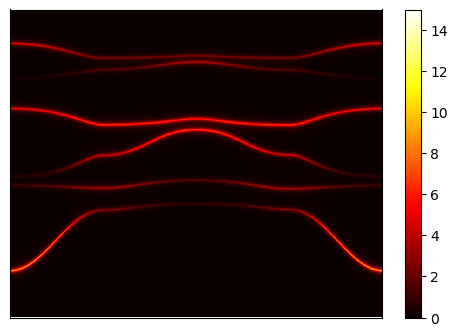

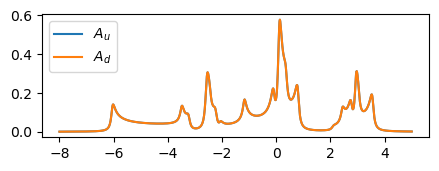

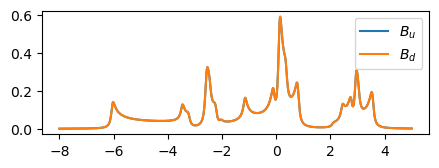

In [7]:
from hubbard.utils.make_kpoints import abacus_kpath

kpoints, xpath, _ = abacus_kpath(
    atoms, 
    np.array([
        [0,0,0,200],
        [0.25,0.25,0,200],
        [0.0,0.5,0,200],
        [-0.25,0.25,0,200],
        [0,0,0,1]
    ])
    )

data = atomicdata.copy()
kpoints[:,:2] = np.stack([kpoints[:,:2].sum(-1), kpoints[:,0] - kpoints[:,1]], axis=-1)
data["kpoint"] = kpoints

Es = np.linspace(-8,5, 1000) + gga.E_fermi
GF = gga.compute_GF(Es=Es, data=data, eta=0.06)
ARPES = -(1/np.pi)*GF.imag.diagonal(offset=0, axis1=-1, axis2=-2)
pdos = ARPES.sum(0) / ARPES.shape[0]
pdos = pdos.reshape(-1,4)
dos = pdos.sum(-1)
ARPES = ARPES.sum(-1)


import matplotlib.pyplot as plt
ARPES = np.flip(ARPES, (0,1))
fig, ax = plt.subplots(figsize=(6,4))
m = ax.matshow(ARPES.T, cmap="hot", vmin=0, vmax=15)
ax.set_aspect('auto')  # override the default 'equal'
ax.set_xticks([])
ax.set_yticks([])
fig.colorbar(m)
plt.show()

plt.figure(figsize=(5,1.6))
# plt.plot(Es, dos)
plt.plot(Es-gga.E_fermi, pdos[:,:2])
plt.legend([f"$A_u$", f"$A_d$"])
plt.show()
plt.figure(figsize=(5,1.6))
plt.plot(Es-gga.E_fermi, pdos[:,2:])
plt.legend([f"$B_u$",f"$B_d$"])
plt.show()

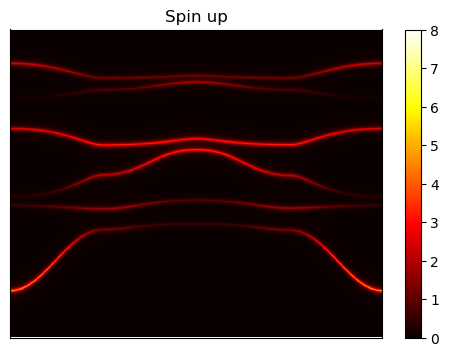

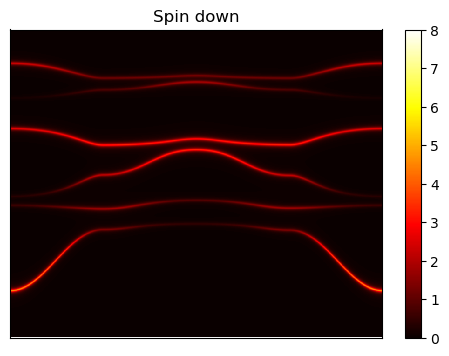

In [8]:
from hubbard.utils.make_kpoints import abacus_kpath

kpoints, xpath, _ = abacus_kpath(
    atoms, 
    np.array([
        [0,0,0,200],
        [-0.25,0.25,0,200],
        [0.0,0.5,0,200],
        [0.25,0.25,0,200],
        [0,0,0,1]
    ])
    )

data = atomicdata.copy()
kpoints[:,:2] = np.stack([kpoints[:,:2].sum(-1), kpoints[:,0] - kpoints[:,1]], axis=-1)
data["kpoint"] = kpoints

Es = np.linspace(-8,5, 1000) + gga.E_fermi
GF = gga.compute_GF(Es=Es, data=data, eta=0.06)
ARPES = -(1/np.pi)*GF.imag.diagonal(offset=0, axis1=-1, axis2=-2)
# ARPES = ARPES.sum(-1)


import matplotlib.pyplot as plt
ARPES = np.flip(ARPES, (0,1))
fig, ax = plt.subplots(figsize=(6,4))
m = ax.matshow((ARPES[:,:,0]+ARPES[:,:,2]).T, cmap="hot", vmin=0, vmax=8)
ax.set_aspect('auto')  # override the default 'equal'
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Spin up")
fig.colorbar(m)
plt.show()

fig, ax = plt.subplots(figsize=(6,4))
m = ax.matshow((ARPES[:,:,1]+ARPES[:,:,3]).T, cmap="hot", vmin=0, vmax=8)
ax.set_aspect('auto')  # override the default 'equal'
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Spin down")
fig.colorbar(m)
plt.show()

# Meanfield result

In [9]:
import numpy as np

kpoints, xpath, _ = abacus_kpath(
    atoms, 
    np.array([
        [0,0,0,200],
        [-0.25,0.25,0,200],
        [0.0,0.5,0,200],
        [0.25,0.25,0,200],
        [0,0,0,1]
    ])
    )
U = 3.5
deltam=0.2

H_up = np.stack([
    2*tm*np.cos((kpoints[:,0]+kpoints[:,1])*2*np.pi)+2*tp*np.cos((kpoints[:,0]-kpoints[:,1])*2*np.pi)-U*deltam,
    2*t*np.cos(kpoints[:,0]*2*np.pi) + 2*t*np.cos(kpoints[:,1]*2*np.pi),
    2*t*np.cos(kpoints[:,0]*2*np.pi) + 2*t*np.cos(kpoints[:,1]*2*np.pi),
    2*tp*np.cos((kpoints[:,0]+kpoints[:,1])*2*np.pi)+2*tm*np.cos((kpoints[:,0]-kpoints[:,1])*2*np.pi)+U*deltam
    ]).T.reshape(-1,2,2)

H_down = np.stack([
    2*tm*np.cos((kpoints[:,0]+kpoints[:,1])*2*np.pi)+2*tp*np.cos((kpoints[:,0]-kpoints[:,1])*2*np.pi)+U*deltam,
    2*t*np.cos(kpoints[:,0]*2*np.pi) + 2*t*np.cos(kpoints[:,1]*2*np.pi),
    2*t*np.cos(kpoints[:,0]*2*np.pi) + 2*t*np.cos(kpoints[:,1]*2*np.pi),
    2*tp*np.cos((kpoints[:,0]+kpoints[:,1])*2*np.pi)+2*tm*np.cos((kpoints[:,0]-kpoints[:,1])*2*np.pi)-U*deltam
    ]).T.reshape(-1,2,2)

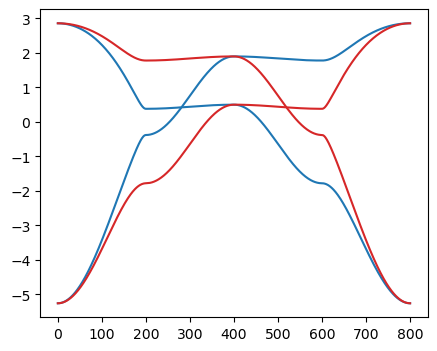

In [12]:
eigvals_up = np.linalg.eigvalsh(H_up)
eigvals_down = np.linalg.eigvalsh(H_down)

fig, ax = plt.subplots(figsize=(5,4))
plt.plot(eigvals_up, c="tab:blue")
plt.plot(eigvals_down, c="tab:red")
plt.show()